In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
#Q1 Load data set
parkinson_df=pd.read_csv('parkinsons.data')

#Q2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)?

parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [32]:
new_pd=parkinson_df.drop([0])
new_pd_df=pd.DataFrame(new_pd)
new_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         194 non-null float64
MDVP:Fhi(Hz)        194 non-null float64
MDVP:Flo(Hz)        194 non-null float64
MDVP:Jitter(%)      194 non-null float64
MDVP:Jitter(Abs)    194 non-null float64
MDVP:RAP            194 non-null float64
MDVP:PPQ            194 non-null float64
Jitter:DDP          194 non-null float64
MDVP:Shimmer        194 non-null float64
MDVP:Shimmer(dB)    194 non-null float64
Shimmer:APQ3        194 non-null float64
Shimmer:APQ5        194 non-null float64
MDVP:APQ            194 non-null float64
Shimmer:DDA         194 non-null float64
NHR                 194 non-null float64
HNR                 194 non-null float64
status              194 non-null int64
RPDE                194 non-null float64
DFA                 194 non-null float64
spread1             194 non-null float64
spread2             194 non-null float64
D2                  194 non-null flo

In [33]:
new_pd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),194.0,154.405119,41.423535,88.333000,117.423000,149.239500,183.144500,260.105000
MDVP:Fhi(Hz),194.0,197.310088,91.683280,102.145000,134.759250,176.212000,224.317250,592.030000
MDVP:Flo(Hz),194.0,116.537660,43.531968,65.476000,84.768750,104.376000,140.532750,239.170000
MDVP:Jitter(%),194.0,0.006212,0.004859,0.001680,0.003460,0.004940,0.007315,0.033160
MDVP:Jitter(Abs),194.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000057,0.000260
MDVP:RAP,194.0,0.003304,0.002975,0.000680,0.001660,0.002485,0.003853,0.021440
MDVP:PPQ,194.0,0.003436,0.002762,0.000920,0.001860,0.002680,0.003938,0.019580
Jitter:DDP,194.0,0.009914,0.008926,0.002040,0.004982,0.007455,0.011558,0.064330
MDVP:Shimmer,194.0,0.029637,0.018879,0.009540,0.016473,0.022965,0.037650,0.119080
MDVP:Shimmer(dB),194.0,0.281510,0.195106,0.085000,0.148250,0.219000,0.349500,1.302000


C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


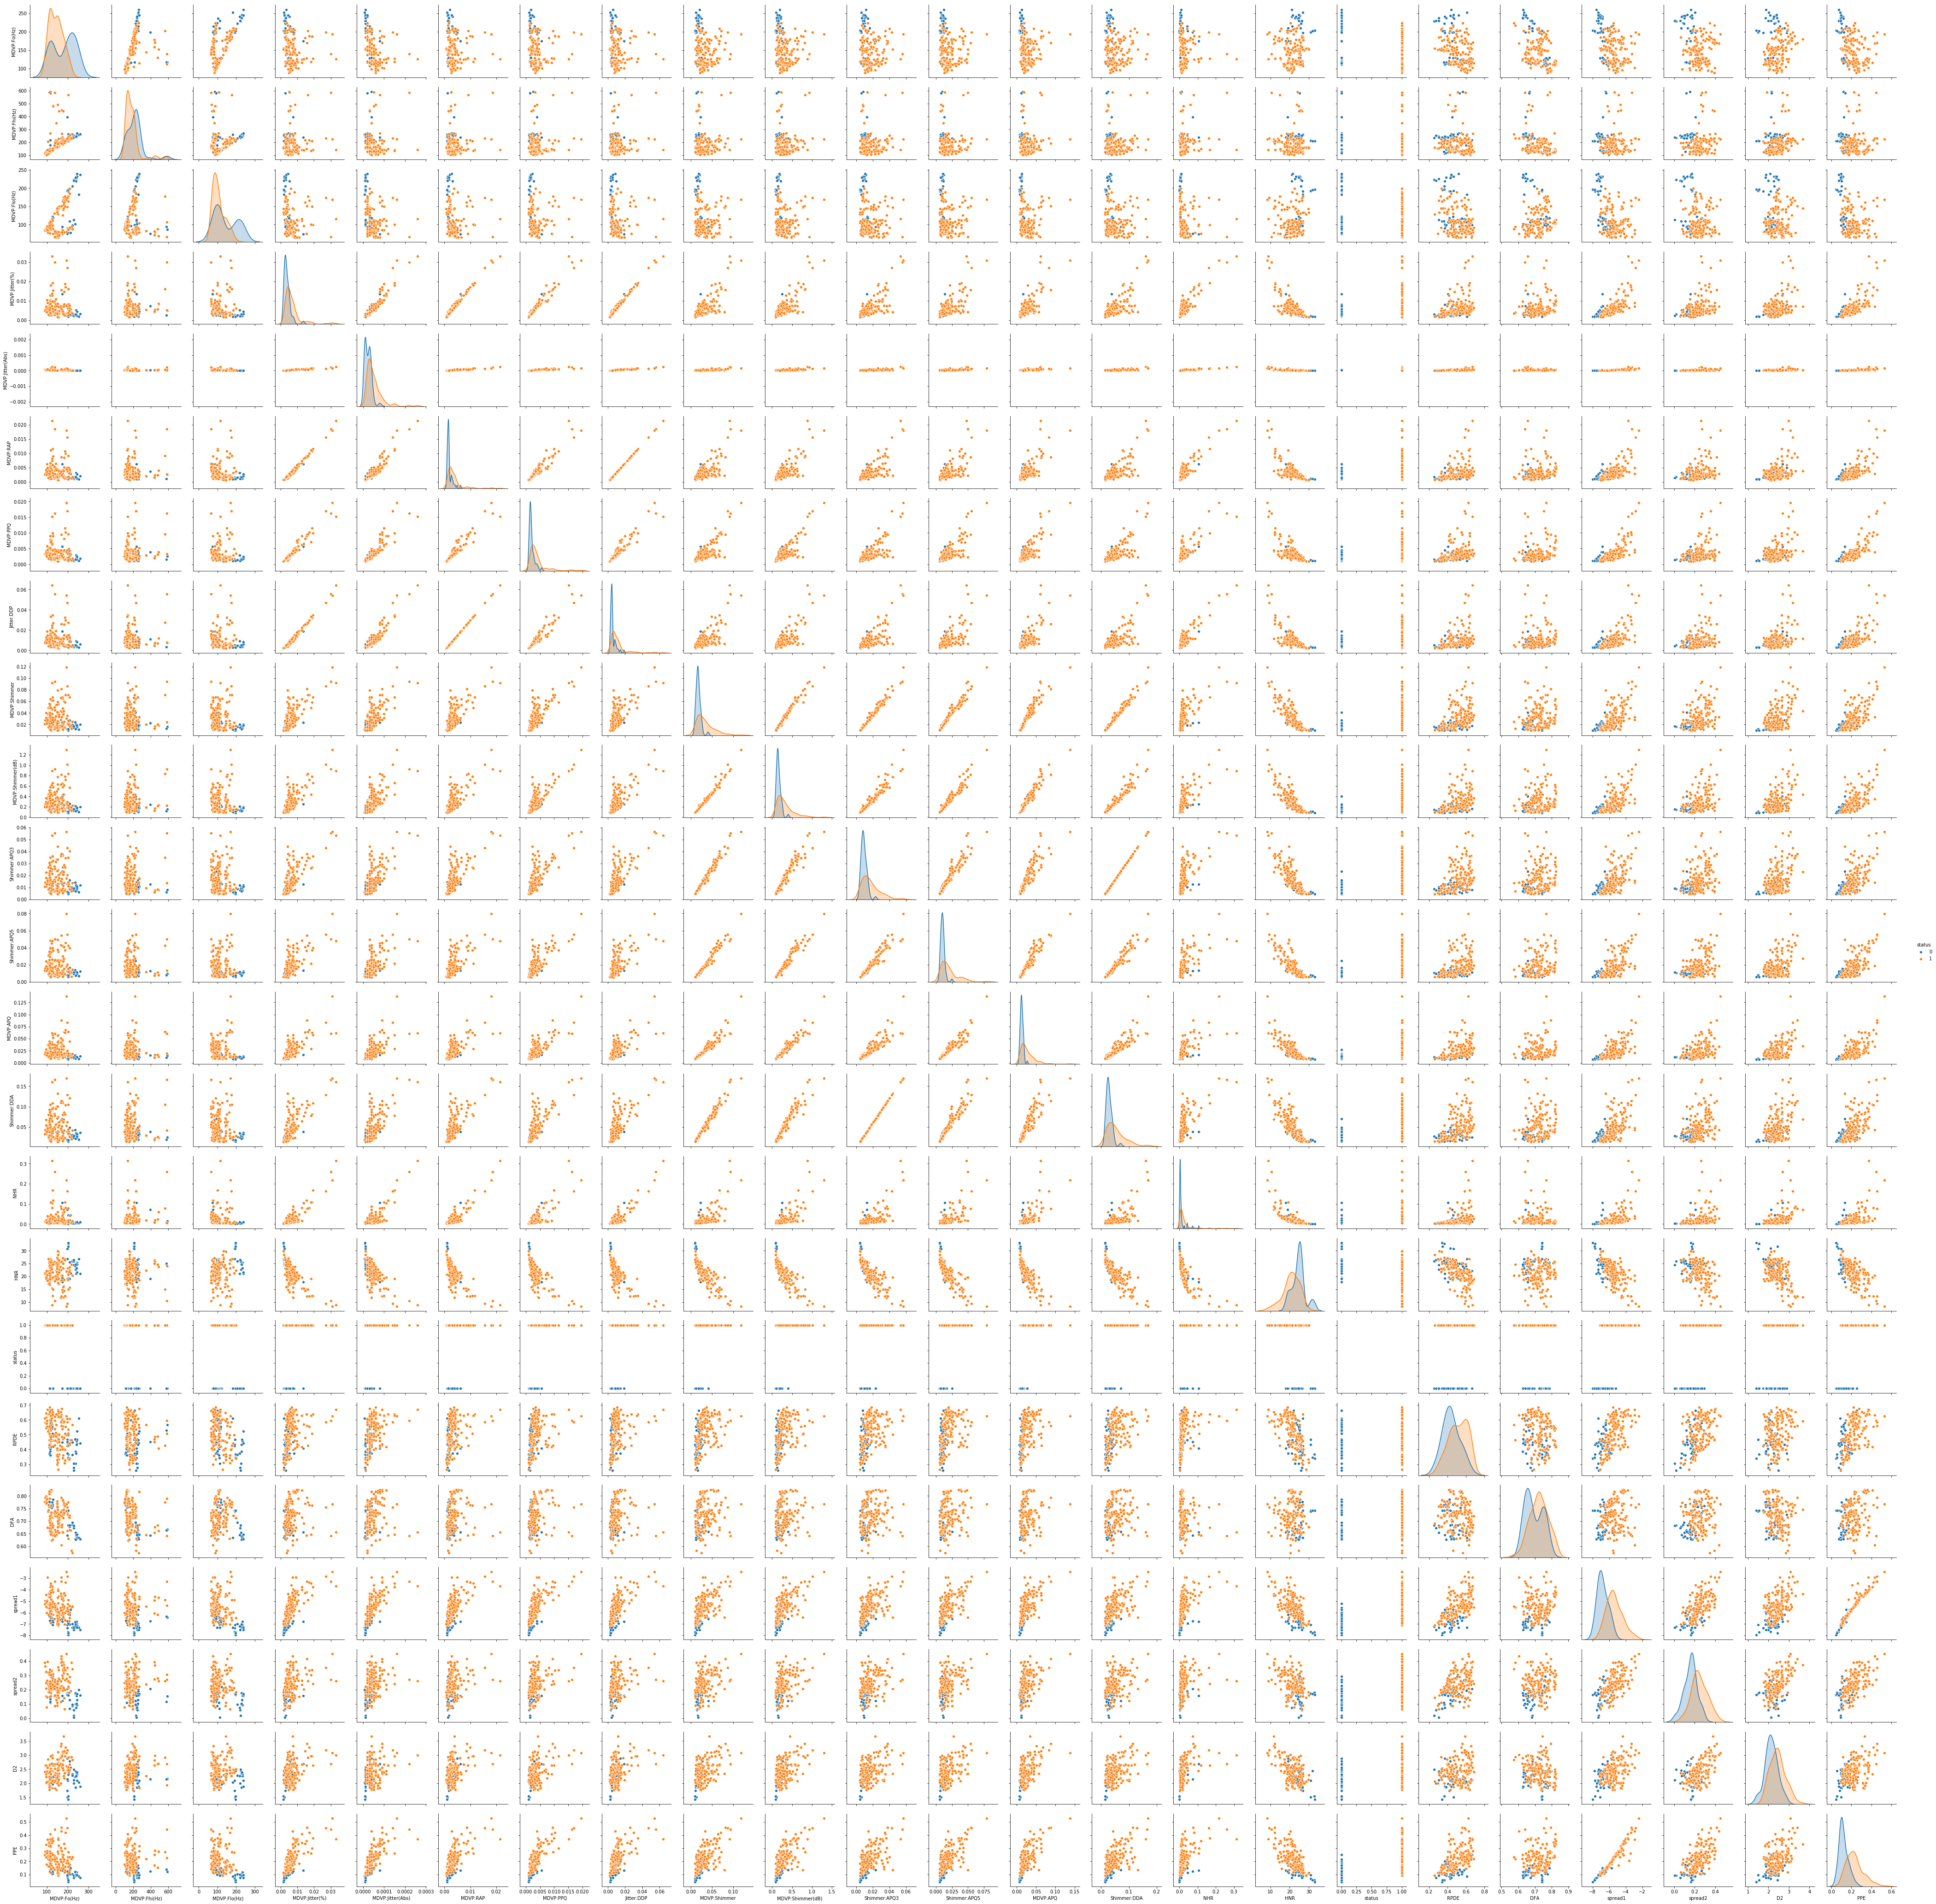

In [34]:
import seaborn as sns

sns.pairplot(new_pd_df,diag_kind='kde',hue='status')

In [35]:
#Q3 Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

#I believe status are dependent more on very few featurs since the plot says mean are overlapping. Only in few feature we can see mean are not overlapping.

In [44]:
#Q4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).?
status_df = new_pd_df.status
x=np.array(new_pd_df.drop(columns=['status']))
y=np.array(status_df)
train_set, test_set, train_labels, test_labels = train_test_split(x, y, test_size=0.25, random_state=1)

In [46]:
#Q5 Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)?
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=1)
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [47]:
#Q6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)?

dt_model.score(test_set , test_labels)

0.9591836734693877

In [48]:
dt_model.score(train_set, train_labels)

1.0

In [49]:
#Q7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [50]:
print("Regularized DT is right fit    ")

print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

Regularized DT is right fit    
0.9862068965517241
0.9387755102040817


In [51]:
#Q8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(train_set, train_labels)

In [52]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.9183673469387755

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
new_pd_df.groupby(["status"]).count() 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146


In [55]:
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier( n_estimators=10)  #the base_estimator can be null. The bagging classifer  will build it's own tree

#enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl), ('dt', dt_model)], voting = 'hard')

stack = VotingClassifier(estimators = [('lor', lrcl), ('nb', nbcl), ('dt', dt_model)], voting = 'hard')

In [57]:
for clf, label in zip([lrcl , rfcl, nbcl, stack, bgcl, dt_model], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Stacking', 'Bagging', 'Decision Tree']):
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Accuracy: 0.81 (+/- 0.09) [Logistic Regression]
Accuracy: 0.73 (+/- 0.09) [RandomForest]
Accuracy: 0.69 (+/- 0.09) [NaiveBayes]


C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dj325\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Us

Accuracy: 0.77 (+/- 0.09) [Stacking]
Accuracy: 0.76 (+/- 0.11) [Bagging]
Accuracy: 0.75 (+/- 0.06) [Decision Tree]
